# 1. First, we need preprocessing


### **1.1 Import libraries**

In [1]:
import glob
import numpy as np
import cv2
import os
import sys
from skimage.metrics import structural_similarity as ssim
from PIL import Image
from numpy import genfromtxt
import random as rd

from matplotlib.pyplot import imread
from imageio import imwrite
#from matplotlib.pyplot import imshow

%matplotlib inline

import matplotlib.pyplot as plt


### 1.2 We can test a frame of dataset to see

<class 'numpy.ndarray'>
The height of that frame is 128
The width of that frame is 88
The channels of that frame is 3


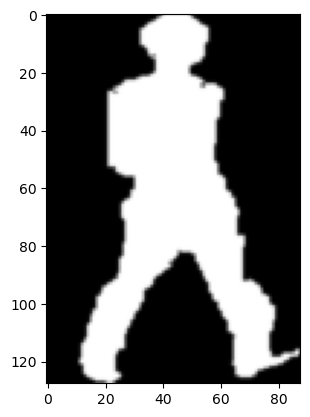

In [7]:
img = cv2.imread('OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(88x128)/Seq00/0000000/00000018.png')
print(type(img)) #we check type of that frame (image)
#stacked_img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
#print(type(stacked_img)) #also check a stack frame

y,x,c = img.shape # Height, width and channels respectively

print("The height of that frame is {0}\nThe width of that frame is {1}\nThe channels of that frame is {2}".format(y,x,c))
plt.imshow(img)

*Demo resize image to 224x224*

(224, 224)
<class 'numpy.ndarray'>


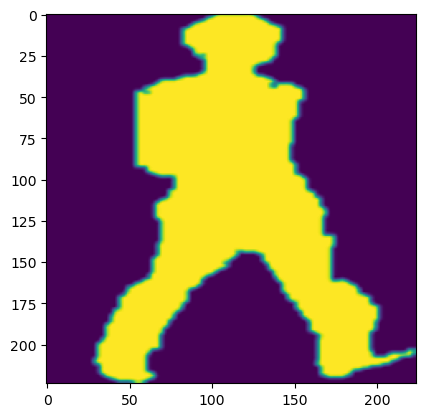

In [8]:
img1 = Image.open('OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(88x128)/Seq00/0000000/00000018.png')
img1 = img1.resize((224, 224))
img1 = np.array(img1)
print(img1.shape)
print(type(img1))
plt.imshow(img1)

### 1.3 Convert all sequences from 88x128 image to 224x224 from folder seq01

In [9]:
data_dir = 'OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(88x128)/Seq01/'
output_dir = 'OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(224x224)'
contents = os.listdir(data_dir)
sequences = [each for each in contents if os.path.isdir(data_dir + '/' + each)]
path1 = os.path.join(output_dir,"Seq01")
try:
  os.mkdir(output_dir)
  os.mkdir(path1)
except OSError as error:
  print(error)
for each in sequences:
    print("Starting {}'th folder".format(each))
    sequence_path = data_dir + '/' + each
    files = os.listdir(sequence_path)
    os.mkdir(os.path.join(path1,each))
    for ii, file in enumerate(files, 1):
        img = Image.open(os.path.join(sequence_path, file))
        img = img.resize((224, 224))
        img = np.array(img)
        cv2.imwrite('{}/{}/{}'.format(path1,each,file), img)

Starting 0000024'th folder
Starting 0000032'th folder
Starting 0000035'th folder
Starting 0000036'th folder
Starting 0000037'th folder
Starting 0000038'th folder
Starting 0000039'th folder
Starting 0000040'th folder
Starting 0000041'th folder
Starting 0000042'th folder
Starting 0000043'th folder
Starting 0000044'th folder
Starting 0000045'th folder
Starting 0000046'th folder
Starting 0000047'th folder
Starting 0000048'th folder
Starting 0000049'th folder
Starting 0000050'th folder
Starting 0000051'th folder
Starting 0000052'th folder
Starting 0000054'th folder
Starting 0000055'th folder
Starting 0000056'th folder
Starting 0000057'th folder
Starting 0000058'th folder
Starting 0000059'th folder
Starting 0000060'th folder
Starting 0000061'th folder
Starting 0000062'th folder
Starting 0000063'th folder
Starting 0000064'th folder
Starting 0000065'th folder
Starting 0000066'th folder
Starting 0000067'th folder
Starting 0000068'th folder
Starting 0000069'th folder
Starting 0000070'th folder
S

### 1.4 Convert all sequences from 88x128 image to 224x224 from folder seq00

In [11]:
data_dir = 'OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(88x128)/Seq00/'
contents = os.listdir(data_dir)

sequences = [each for each in contents if os.path.isdir(data_dir + '/' + each)]
path2 = os.path.join(output_dir,"Seq00")
try:
  os.mkdir(path2)
except OSError as error:
  print(error)
for each in sequences:
    print("Starting {}'th folder".format(each))
    sequence_path = data_dir + '/' + each
    files = os.listdir(sequence_path)
    os.mkdir(os.path.join(path2,each))
    for ii, file in enumerate(files, 1):
        img = Image.open(os.path.join(sequence_path, file))
        img = img.resize((224, 224))
        img = np.array(img)
        cv2.imwrite('{}/{}/{}'.format(path2,each,file), img)

Starting 0000000'th folder
Starting 0000001'th folder
Starting 0000002'th folder
Starting 0000003'th folder
Starting 0000004'th folder
Starting 0000005'th folder
Starting 0000006'th folder
Starting 0000008'th folder
Starting 0000009'th folder
Starting 0000010'th folder
Starting 0000011'th folder
Starting 0000012'th folder
Starting 0000013'th folder
Starting 0000014'th folder
Starting 0000015'th folder
Starting 0000016'th folder
Starting 0000017'th folder
Starting 0000018'th folder
Starting 0000020'th folder
Starting 0000021'th folder
Starting 0000023'th folder
Starting 0000024'th folder
Starting 0000025'th folder
Starting 0000026'th folder
Starting 0000027'th folder
Starting 0000028'th folder
Starting 0000029'th folder
Starting 0000031'th folder
Starting 0000032'th folder
Starting 0000033'th folder
Starting 0000034'th folder
Starting 0000035'th folder
Starting 0000036'th folder
Starting 0000037'th folder
Starting 0000038'th folder
Starting 0000039'th folder
Starting 0000040'th folder
S

### 1.5 Convert all sequences from 88x128 image to 64x64 from folder seq01 for later purpose

In [3]:
data_dir = 'OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(88x128)/Seq01/'
output_dir = 'OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(64x64)'
contents = os.listdir(data_dir)
sequences = [each for each in contents if os.path.isdir(data_dir + '/' + each)]
path3 = os.path.join(output_dir,"Seq01")
try:
  os.mkdir(output_dir)
  os.mkdir(path3)
except OSError as error:
  print(error)
for each in sequences:
    print("Starting {}'th folder".format(each))
    sequence_path = data_dir + '/' + each
    files = os.listdir(sequence_path)
    os.mkdir(os.path.join(path3,each))
    for ii, file in enumerate(files, 1):
        img = Image.open(os.path.join(sequence_path, file))
        img = img.resize((64, 64))
        img = np.array(img)
        cv2.imwrite('{}/{}/{}'.format(path3,each,file), img)

Starting 0000024'th folder
Starting 0000032'th folder
Starting 0000035'th folder
Starting 0000036'th folder
Starting 0000037'th folder
Starting 0000038'th folder
Starting 0000039'th folder
Starting 0000040'th folder
Starting 0000041'th folder
Starting 0000042'th folder
Starting 0000043'th folder
Starting 0000044'th folder
Starting 0000045'th folder
Starting 0000046'th folder
Starting 0000047'th folder
Starting 0000048'th folder
Starting 0000049'th folder
Starting 0000050'th folder
Starting 0000051'th folder
Starting 0000052'th folder
Starting 0000054'th folder
Starting 0000055'th folder
Starting 0000056'th folder
Starting 0000057'th folder
Starting 0000058'th folder
Starting 0000059'th folder
Starting 0000060'th folder
Starting 0000061'th folder
Starting 0000062'th folder
Starting 0000063'th folder
Starting 0000064'th folder
Starting 0000065'th folder
Starting 0000066'th folder
Starting 0000067'th folder
Starting 0000068'th folder
Starting 0000069'th folder
Starting 0000070'th folder
S

### 1.6 Convert all sequences from 88x128 image to 64x64 from folder seq00 for later purpose

In [4]:
data_dir = 'OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(88x128)/Seq00/'
contents = os.listdir(data_dir)

sequences = [each for each in contents if os.path.isdir(data_dir + '/' + each)]
path4 = os.path.join(output_dir,"Seq00")
try:
  os.mkdir(path4)
except OSError as error:
  print(error)
for each in sequences:
    print("Starting {}'th folder".format(each))
    sequence_path = data_dir + '/' + each
    files = os.listdir(sequence_path)
    os.mkdir(os.path.join(path4,each))
    for ii, file in enumerate(files, 1):
        img = Image.open(os.path.join(sequence_path, file))
        img = img.resize((64, 64))
        img = np.array(img)
        cv2.imwrite('{}/{}/{}'.format(path4,each,file), img)

Starting 0000000'th folder
Starting 0000001'th folder
Starting 0000002'th folder
Starting 0000003'th folder
Starting 0000004'th folder
Starting 0000005'th folder
Starting 0000006'th folder
Starting 0000008'th folder
Starting 0000009'th folder
Starting 0000010'th folder
Starting 0000011'th folder
Starting 0000012'th folder
Starting 0000013'th folder
Starting 0000014'th folder
Starting 0000015'th folder
Starting 0000016'th folder
Starting 0000017'th folder
Starting 0000018'th folder
Starting 0000020'th folder
Starting 0000021'th folder
Starting 0000023'th folder
Starting 0000024'th folder
Starting 0000025'th folder
Starting 0000026'th folder
Starting 0000027'th folder
Starting 0000028'th folder
Starting 0000029'th folder
Starting 0000031'th folder
Starting 0000032'th folder
Starting 0000033'th folder
Starting 0000034'th folder
Starting 0000035'th folder
Starting 0000036'th folder
Starting 0000037'th folder
Starting 0000038'th folder
Starting 0000039'th folder
Starting 0000040'th folder
S

# 2. Generate the GEI image from each folder

GEI is defined as follow 
$$G_{x,y} = \frac{1}{N} \sum_{t=1}^N B_t(x,y) \hspace{10pt} (1)$$

## 2.1 First, let take the sample test

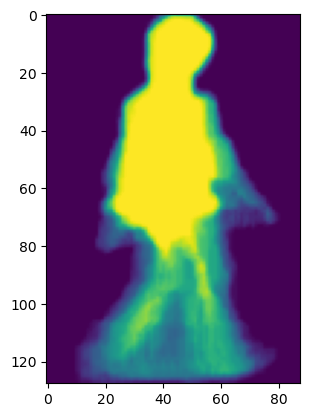

In [9]:

lists = np.ndarray((30,128,88)) #30 means 30 frames , 128 is the height of frame, 88 is the width of frame

path = 'OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(88x128)/Seq00/1000001'
dirs = os.listdir(path)
#print(dirs)
dirs = dirs[17:47]

for ii, image in enumerate(dirs):
    lists[ii, :, :] = imread(os.path.join(path, image))
lists = 1/30*np.sum(lists, axis=0)
plt.imshow(lists)
plt.imsave("images/sampleGEI1.png",lists)

## 2.2 Create GEI Function

**We will demonstrate another methods to compute GEI more efficiently**  

###  _1: Border_
The border of the smallest rectangle that contains a silhouette can be defined using the coordinates of its
four corners. These coordinates can be extracted using the minimum of the minimum values of each row
and column, and the maximum of the maximum values of each row and column.

<center><img src="https://drive.google.com/uc?export=view&id=1Ryw7fVs8ylkjE2HRNfdfunsmrq3hc4O7"/></center>

<center><strong>Fig. 2</strong> The smallest rectangle that contains a silhouette</center>
$$x_{min} = min\{min_k\{x_i\}_{i=1}^{l_n}\}_{k=1}^{N_r} \hspace{10pt} (2)$$

Where $x_i$ is the $x$ coordinate of each pixel, $l_n$ is the length of the $n^{th}$ row, $k$ is the number of the row, and $N_r$ is the total number of rows.

In the same way:

$$x_{max} = max\{max_k\{x_i\}_{i=1}^{l_n}\}_{k=1}^{N_r} \hspace{10pt} (3)$$
$$y_{min} = min\{min_k\{y_i\}_{i=1}^{l_n}\}_{k=1}^{N_c} \hspace{10pt} (4)$$
$$y_{max} = max\{max_k\{y_i\}_{i=1}^{l_n}\}_{k=1}^{N_r} \hspace{10pt} (5)$$

<center><img src="https://drive.google.com/uc?export=view&id=1xY2rRq5D5lB9r9fyEjIyN02DCkcwSHKL"/></center>
<center><strong>Fig. 3</strong> The minimum and maximum x,y coordinates of a silhouette in blue and green respectively.</center>


In [10]:
#Finding the corner coordinates of the rectangle surrounding the silhouette
def Border(img):
    height, width = img.shape # Import height and width from frames
    indexl = [] # x-coordinates of left-most pixel of each row
    indexr = [] # x-coordinates of right-most pixel of each row
    for i in range(height): # For each row
        for j in range(width): # Start from the left-most pixel
            if img[i,j] != 0: # If the pixel is not black
                indexl.append(j) # Append its x-coordinate
                break # Move to next row
        for j in reversed(range(width)): # Start from the right-most pixel
            if img[i,j] != 0: # If the pixel is not black
                indexr.append(j) # Append its x-coordinate
                break # Move to next row
    x = min(indexl) # The left-most x-coordinate in all rows
    X = max(indexr) # The right-most x-coordinate in all rows
    indext = [] # y-coordinates of top-most pixel of each column
    indexb = [] # y-coordinates of bottom-most pixel of each column
    for j in range(width):
        for i in range(height): # Start from the top-most pixel
            if img[i,j] != 0: # If the pixel is not black
                indext.append(i) # Append its y-coordinate
                break # Move to next column
        for i in reversed(range(height)): # Start from the bottom-most pixel
            if img[i,j] != 0: # If the pixel is not black
                indexb.append(i) # Append its y-coordinate
                break # Move to next column
    y = min(indext) # The top-most y-coordinate in all columns
    Y = max(indexb) # The bottom-most y-coordinate in all columns
    return x,X,y,Y

In [11]:
#Cropping the silhouette based on the results from Border function
def Crop(img,x,X,y,Y):
    Crop = img[y:Y, x:X]
    return Crop

###  _2: Center of Mass_
In a binary image, the center of mass is the point where the sum of relative coordinates of all white pixels is 0.
    
<center><img src="https://drive.google.com/uc?export=view&id=1sZyxyez8ACMYqrTlloqxuRBq8u29mHI2"/></center>
<center><strong>Fig. 4</strong> The center of mass of four green pixels shown in red</center>

To get the coordinates of the center of mass of a silhouette, we calculate the weighted mean of the
center of each row to get the $x$ coordinate, and the weighted mean of the center of each column to get
the $y$ coordinate.

$$C_x = \frac{1}{S_r} \sum_{n=1}^{H}l_nX_n \hspace{10pt} (6)$$

Where $C_x$ is the $x$ coordinate of the center of mass of the silhouette, $l_n$ is the weight of the n-row which
is its length, Xn is the x coordinate of the center of the $n^{th}$ row, and $S_r$ is the sum of weights of all rows.
Since the weights of rows are their lengths, $S_r$ can be expressed as the sum of lengths of all rows.

<center><img src="https://drive.google.com/uc?export=view&id=1WaqfUtEEyA2Ct0txRtire7m_P7QUky9b"/></center>
<center><strong>Fig. 5</strong> The centers of each row of a random picture, in blue</center>

$X_n$ can be calculated by dividing the sum of the x coordinates of the white pixels of the $n^{th}$ row on
the length of the same row.

$$X_n = \frac{\sum_{i=1}^{l_n}x_i}{l_n} \hspace{10pt} (8)$$

By substituing (8) in (6), we get:

$$C_x = \frac{1}{S_r}\sum_{n=1}^H\sum_{i=1}^{l_n}x_i \hspace{10pt}(9)$$

Following the same steps, the $y$ coordinate of the center of mass is:

$$C_y = \frac{1}{S_c}\sum_{n=1}^W\sum_{i=1}^{l_n}y_i \hspace{10pt}(10)$$

<center><img src="https://drive.google.com/uc?export=view&id=1f-yZIZQ5slkzUfRZoLkZwgOPR9dakqqT"/></center>
<center><strong>Fig. 6</strong> The center of mass of a random silhouette</center>

In [12]:
# Finding the center of mass of a silhouette
def CenterOfMass(img):
    height, width = img.shape # Import height and width from frames
    X = [] # Sum of x-coordinates of each row
    Y = [] # Sum of y-coordinates of each column
    WoR = [] # Weights of rows
    WoC = [] # Weights of columns
    for i in range(height):
        Nx = [] # x-coordinates of silhouette pixels in a single row
        for j in range(width):
            if img[i,j] == 255: # If the pixel is white
                Nx.append(j) # Append its x-coordinate
        if len(Nx) != 0: # If the row is not empty
            X.append(sum(Nx)) # Append the sum of the x-coordinates of the row
            WoR.append(len(Nx)) # Append the number of white pixels of the row
    CoMX = sum(X) // sum(WoR) # The average of the x-coordinates is their center of mass on x
    for j in range(width):
        Ny = [] # y-coordinates of silhouette pixels in a single column
        for i in range(height):
            if img[i,j] == 255: # If the pixel is white
                Ny.append(i) # Append its y-coordinate
        if len(Ny) != 0: # If the column is not empty
            Y.append(sum(Ny)) # Append the sum of the y-coordinates of the column
            WoC.append(len(Ny)) # Append the number of white pixels of the column
    CoMY = sum(Y) // sum(WoC) # The average of the y-coordinates is their center of mass on y
    return CoMX, CoMY # Return the coordinates of the center of mass of the silhouette

### _C_ : Alignment

In the original work by J. Han and B. Bhanu, the silhouettes were vertically resized to fit the height of one of them, and were aligned horizontally by centering the upper half silhouette part with respect to its horizontal centroid.

In our work however, we chose to keep the original size of each silhouette in order to avoid any loss or distortion of information from resizing.

We also chose to align the silhouettes both vertically and horizontally using their center of mass and not the upper parts centroids. The reason for this is that the upper part centroid is highly susceptible to clothing changes (coat, hat, bag...)

The code will align the center of mass of each silhouette to the center of a black image that has the same dimensions as the video frame.

We can combine images in OpenCV by providing the coordinates of the top left corner of the smaller image (the silhouette) in the bigger image’s frame (the black image), and the height and width of the smaller image.

$$X = \frac{W}{2} - C_x\hspace{10pt} (11)$$

$$Y = \frac{H}{2} - C_y\hspace{10pt} (12)$$

Where $X$,$Y$ are the $x$,$y$ coordinates of the the top left corner of the silhouette, $W$ ,$H$ are the width and
height of the black image, and $C_x$,$C_y$ are the coordinates of the center of mass, in equations (9) and (10)

<center><img src="https://drive.google.com/uc?export=view&id=1dsRFkbfrRiRAauoF38o5qFAl1WpXRviH"/></center>
<center><strong>Fig. 7</strong> Top left corner x coordinate of the silhouette image</center>


### _D_: Combination

As shown in equation (1), GEI calculates the mean value at each pixel of all the silhouettes binary images.
The result is a gradient image where it is brighter in areas that are part of the silhouettes more often, and
darker in areas that are part of the silhouettes less often.

We can calculate this mean, by adding each silhouette consecutively and calculating the current GEI.
We repeat the following equation for each silhouette _t_:

$$G_{x,y} = \alpha B_t(x,y) + \beta B_{t-1}(x,y) \hspace{10pt} (13)$$

Where $B_t$ is the intensity of a pixel in the current silhouette, $B_{t−1}$ is the intensity of a pixel in the GEI
up to the previous silhouette, and:

$$\alpha = \frac{1}{n+1} \hspace{10pt} (14)$$

Where $n$ is the number of the silhouette. It starts from 1 if the first image is the first silhouette, and from
0 if the first image is the black image. And: 

$$\beta = 1 - \alpha \hspace{10pt} (15)$$

<center><img src="https://drive.google.com/uc?export=view&id=1oD5NIyXgqYsbp6x1XV03YoOhZe4UT6vh"/></center>
<center><strong>Fig. 7</strong> Combining a silhouette with the GEI of the previous frames using equation (13)</center>

Well, when I try sample images, I found that there are some outliers so our ideas is not completely perfectly, so we address that issues by assume if there're out of index we find the nearest point

In [13]:
def Combine(old,new,center,i): # Current GEI, new frame, center of mass, black background, frame index
    height, width = old.shape
    center_x, center_y = center

    # Calculate the position for the new silhouette
    
    x_start = max((width // 2) - center_x, 0)
    y_start = max((height // 2) - center_y, 0)

    # Calculate the end positions, ensuring they do not exceed the old image dimensions
    
    x_end = min(x_start + new.shape[1], width)
    y_end = min(y_start + new.shape[0], height)

    # Adjust the new silhouette size if it exceeds the bounds of the old image
    
    new_cropped = new[:y_end - y_start, :x_end - x_start]

    # Calculate alpha and beta for blending
    
    alpha = 1.0 / (i + 1)
    beta = 1.0 - alpha

    # Blend the new silhouette into the corresponding region of the old GEI
    blended_region = cv2.addWeighted(new_cropped, alpha, old[y_start:y_end, x_start:x_end], beta, 0.0)

    # Update the corresponding region in the old image
    old[y_start:y_end, x_start:x_end] = blended_region

    return old
    #return new

In [16]:
def generateGEI(path):
    
    #im = path[0] #first frame
    im = cv2.imread(path[0]) #Read the first frame
    y,x,c = im.shape #Height, width and channel respectively

    #Combining the functions
    black = np.zeros((y,x), np.uint8) # Black background
    GEI = black # Define GEI
    i = 0 # Define frames index
    #print(black.shape)
    for _path in path:
        image = cv2.imread(_path) #Read the frame
        image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        x,X,y,Y = Border(image)
        cropped = Crop(image,x,X,y,Y)
        center = CenterOfMass(cropped)
        GEI = Combine(GEI,cropped,center,i)
        i += 1#Add 1 to the index of frames
    return GEI

## Let take the sample test

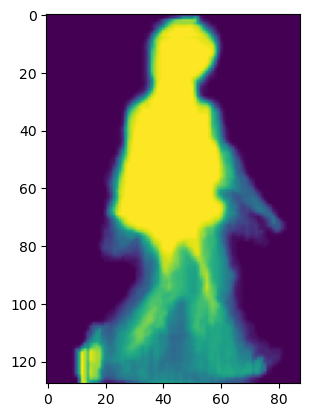

In [17]:
path = 'OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(88x128)/Seq00/1000001/*.png'
path = glob.glob(path)

path = path[17:47]
#print(dirs)
GEI = generateGEI(path)
plt.imshow(GEI)
plt.imsave("images/sampleGEI2.png",GEI)

## Comparison

**Compare with the image above, we will use the _Mean Square Error(MSE)_ of the pixel values of two images, similar images will have less mean square error theorem. Moreover, we'll also use Number of _Pixel Change Rate (NPCR)_ and The _Unified Average Changing Intensity (UACI)_**

In [32]:
img1 = cv2.imread('images/sampleGEI1.png')
img2 = cv2.imread('images/sampleGEI2.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)




<left><img src="https://drive.google.com/uc?export=view&id=1YFawT8ML6p9abdw9j5VXVGXj0I4NruLJ"/></left>

$UACI = \sum_{i=1}^M\sum_{j=1}^N\frac{|I_0(i,j) - I_{ENC}(i,j)|}{(2^a - 1) \times M \times N} \times 100\%
  $

### Define a function to compute the Mean Squared Error between two images.

In [19]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
    
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	diff = cv2.subtract(imageB.astype("float"),imageA.astype("float"))

	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err,diff

In [20]:
def compare_images(imageA, imageB, title):
    # compute the mean squared error and structural similarity
    # index for the images
    m = mse(imageA, imageB)[0]
    s = ssim(imageA, imageB)
    
    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
    
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
    
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
    
    
    # show the images
    plt.show()
    plt.imshow(mse(imageA,imageB)[1] , cmap = plt.cm.gray)


### Define the function number of pixels change rate (NPCR)

In [39]:
def calc_npcr(img_1, img_2):
    diff = np.abs(img_1 - img_2)
    binary_diff = (diff > 0.5).astype(int)
    npcr = np.sum(binary_diff) / np.prod(img_1.shape)
    return npcr

### Define the function unified average changing intensity (UACI)

In [41]:
def calc_uaci(img1, img2):
    
    diff = np.abs(img1 - img2)
    uaci = np.sum(diff) / (255 * np.prod(img1.shape))
    
    return uaci

#### Print the image matching error (mse) and display the image difference between the images.

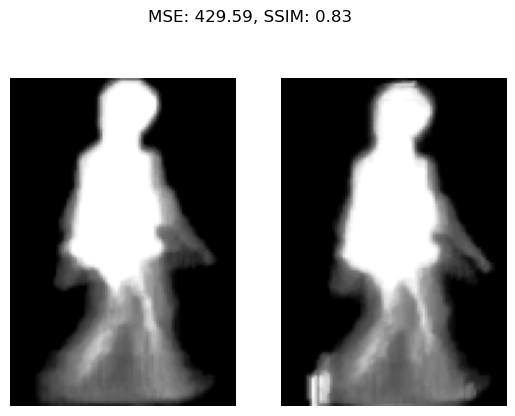

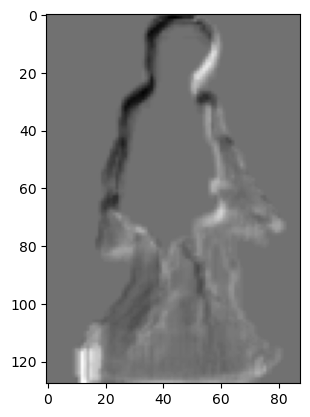

In [23]:
compare_images(img1, img2, "Image 1 vs. Image 2")

#### Test NPCR and UACI

In [40]:
print(calc_npcr(img1, img2))

0.3977272727272727


In [42]:
print(calc_uaci(img1, img2))

0.2276163519385027


### We want to build a network, which can transform different kind of incomplete GEI, whether it's composed of 1 frames or 10 frames of Gait silhouettes or different start frame ... , direct to complete GEI, which has almost one kind of shape for each subject:
<center><img src="https://drive.google.com/uc?export=view&id=1AhhLOKlsJf4PVGuB7jBguNWytMK6a1Pp"/></center>
<center><strong>Fig. 8</strong> Different types of incomplete GEI</center>

### confirm probe and gallery have same subjects


In [18]:
x = 0 
for i,j in zip(IDList_A_55_gallery, IDList_A_55_probe):
    if i[0] != j[0]:
        x += 1
print(x)



0


We will choose 55 degree since this project doesn't require a view recognition 

#### First, let's generate the function "generate_custom_frame_indices" 

In [53]:
def generate_custom_frame_indices(n_frames, complete_cycle=30):
    """
    Generates a sequence of frame indices for incomplete GEI generation.
    The sequence starts with 1 and follows a specific pattern up to a complete cycle.
    """
    pattern = [1, 3, 5, 8, 10, 13, 15, 18, 20]  # The given pattern
    # Extend the pattern if more frames are needed
    while len(pattern) < n_frames:
        next_frame = pattern[-1] + (3 if (pattern[-1] - pattern[-2]) == 2 else 2)
        if next_frame > complete_cycle:
            break
        pattern.append(next_frame)
    return pattern[:n_frames]

We choose different number of frames such as 3,5,8... up to 30 for generating incomplete gait cycles, we also set condition threshold. 

#### Next, generate the function "generate_incomplete_GEIs"

In [62]:
def generate_incomplete_GEIs(subject_dirs, n_frames):
    incomplete_GEIs = []
    #subject_dirs = glob.glob(os.path.join(folder_path,'*'))
    #total_images = len(subject_dirs)
    frame_indices = generate_custom_frame_indices(n_frames, complete_cycle=30) #assume complete_cycle is 30 image

    random_start_index = rd.randint(1,5) #For more generalization
    for i in range(len(frame_indices)):
        incomplete_GEIs.append(subject_dirs[random_start_index:random_start_index+frame_indices[i]]) #Assume start the first index

    return incomplete_GEIs

This function will create a list of type of incomplete gait cycles and we also choose a random start frame for more general

#### Generate the function "generate_save_path"

In [60]:
def generate_save_path(folder_path, subject_dir, degree,frames):
    save_path = os.path.join(folder_path, subject_dir, '{}_{}_GEI_{}f'.format(subject_dir, str(degree),frames))  
      
    return save_path

#### Generate the function "generate_image_list"

In [61]:
def generate_image_list(csv_file):
    for subject in csv_file:
        #images_list = np.ndarray((30, 224, 224))
        #print(type(subject[0]))
        subject_dir = str(subject[0])
        #print(subject_dir)
        if len(subject_dir) != 7:
            subject_dir = '0' * (7 - len(subject_dir)) + subject_dir
            
        yield (subject_dir)

This function will call the csv file and process the subject folder name

#### Generate the function "generate_custom_path_gallery", which is our training data

In [67]:
def generate_custom_path_gallery(path):
    IDList_A_55_gallery = genfromtxt('OULP-C1V2_Pack/OULP-C1V2_Subject_IDList/IDList_OULP-C1V2-A-55_Gallery.csv',delimiter=',', dtype=np.int32)

    path_ = path + '/Seq00'  
    image_list = generate_image_list(IDList_A_55_gallery)
    for num_loop in range(len(IDList_A_55_gallery)):

        Folder = next(image_list)
        print("This is folder {}'th".format(Folder))
        P = path_ + "/" + Folder + "/*.png"
        
        P = glob.glob(P)
        lst_incomplete_GEI = generate_incomplete_GEIs(P,40) 
        for sequences in lst_incomplete_GEI: # For every frame in the path           
            im = cv2.imread(lst_incomplete_GEI[lst_incomplete_GEI.index(sequences)][0]) # Read the first frame
            y,x,c = im.shape # Height, width and channels respectively

            black = np.zeros((y,x), np.uint8) # Black background
            GEI = black # Define GEI

            i = 0 # Define frames index
            N = len(sequences)
            new_folder_path = "OULP-C1V2_Pack/Preprocess/OULP_GEI_{0}_{1}f/Seq00".format(path[path.find('('):path.find(')')+1],N)
            os.makedirs(new_folder_path + "/{}".format(Folder))
            for frame in sequences:
                if i == len(frame):break
                image = cv2.imread(frame)
                image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) # Turn the frame to one channel   
                x,X,y,Y = Border(image) # Find the borders of the silhouette
                cropped = Crop(image,x,X,y,Y) # Crop the silhouette
                center = CenterOfMass(cropped) # Find the center of mass of the silhouette
                GEI = Combine(GEI,cropped,center,i) # Find the GEI with the latest frame
                i += 1 # Add 1 to index of frames
            i = 0
            #Visualising the result
            x,X,y,Y = Border(GEI) # Find the borders of the GEI
            GEI = Crop(GEI,x,X,y,Y) # Crop the GEI    

            save_path = generate_save_path(new_folder_path, "{}".format(Folder), 55,N)
            if os.path.isdir(os.path.join(new_folder_path, Folder)):
                imwrite('{}.png'.format(save_path), GEI)
                print("Convert incomplete gait GEI-{}f sucessfully".format(N))
            else:
                continue
        print()

#### Generate function "generate_custom_path_probe", which is our test and validation data

In [68]:
def generate_custom_path_probe(path):
    IDList_A_55_probe = genfromtxt('OULP-C1V2_Pack/OULP-C1V2_Subject_IDList/IDList_OULP-C1V2-A-55_Probe.csv',delimiter=',', dtype=np.int32)
    #print(IDList_A_55_probe[0])
    path_ = path + '/Seq01'  
    image_list = generate_image_list(IDList_A_55_probe)
    for num_loop in range(len(IDList_A_55_probe)):
        Folder = next(image_list)
        print("This is the folder {}'th".format(Folder))

        P = path_ + "/" + Folder + "/*.png"

        P = glob.glob(P)
        lst_incomplete_GEI = generate_incomplete_GEIs(P,40) 
        for sequences in lst_incomplete_GEI: # For every frame in the path          
            im = cv2.imread(lst_incomplete_GEI[lst_incomplete_GEI.index(sequences)][0]) # Read the first frame
            y,x,c = im.shape # Height, width and channels respectively
            black = np.zeros((y,x), np.uint8) # Black background
            GEI = black # Define GEI
            i = 0 # Define frames index
            N = len(sequences)
            new_folder_path = "OULP-C1V2_Pack/Preprocess/OULP_GEI_{0}_{1}f/Seq01".format(path[path.find('('):path.find(')')+1],N)
            os.makedirs(new_folder_path + "/{}".format(Folder))
            for frame in sequences:
                if i == len(frame):break
                image = cv2.imread(frame)
                image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) # Turn the frame to one channel
                x,X,y,Y = Border(image) # Find the borders of the silhouette
                cropped = Crop(image,x,X,y,Y) # Crop the silhouette
                center = CenterOfMass(cropped) # Find the center of mass of the silhouette
                GEI = Combine(GEI,cropped,center,i) # Find the GEI with the latest frame
                i += 1 # Add 1 to index of frames
            i = 0
            #Visualising the result
            x,X,y,Y = Border(GEI) # Find the borders of the GEI
            GEI = Crop(GEI,x,X,y,Y) # Crop the GEI    
            save_path = generate_save_path(new_folder_path, "{}".format(Folder), 55,N)
            if os.path.isdir(os.path.join(new_folder_path, Folder)):
                imwrite('{}.png'.format(save_path), GEI)
                print("Convert incomplete gait GEI-{}f sucessfully".format(N))
            else:
                continue  
        print()

### Let's convert 

In [ ]:
if __name__ == "__main__":
   

    #Importing the silhouettes, and getting their dimensions
    #path1 = 'OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(224x224)' # Path of the frames
    path2 = 'OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(88x128)'
    #path3 = 'OULP-C1V2_Pack/OULP-C1V2_NormalizedSilhouette(64x64)'
    generate_custom_path_gallery(path2)
    generate_custom_path_probe(path2)
    

This is folder 0000024'th
Convert incomplete gait GEI-1f sucessfully
Convert incomplete gait GEI-3f sucessfully
Convert incomplete gait GEI-5f sucessfully
Convert incomplete gait GEI-8f sucessfully
Convert incomplete gait GEI-10f sucessfully
Convert incomplete gait GEI-13f sucessfully
Convert incomplete gait GEI-15f sucessfully
Convert incomplete gait GEI-18f sucessfully
Convert incomplete gait GEI-20f sucessfully
Convert incomplete gait GEI-23f sucessfully
Convert incomplete gait GEI-25f sucessfully
Convert incomplete gait GEI-28f sucessfully
Convert incomplete gait GEI-30f sucessfully

This is folder 0000035'th
Convert incomplete gait GEI-1f sucessfully
Convert incomplete gait GEI-3f sucessfully
Convert incomplete gait GEI-5f sucessfully
Convert incomplete gait GEI-8f sucessfully
Convert incomplete gait GEI-10f sucessfully
Convert incomplete gait GEI-13f sucessfully
Convert incomplete gait GEI-15f sucessfully
Convert incomplete gait GEI-18f sucessfully
Convert incomplete gait GEI-20f

The same for size 224x224, 64x64